<h2>Preliminary Analysis and Data Preprocessing</h2>

In this module, we talk about exploratory analysis on the data to detect potential problems that are then fixed with data preprocessing.

We will use the loan data. The columns in the data are as follows. The target in this data is Loan Status - whether the loan has been fully paid or charged off. 

- Loan ID                      
- Customer ID                  
- Loan Status                  
- Current Loan Amount          
- Term                         
- Credit Score                 
- Annual Income                
- Years in current job         
- Home Ownership               
- Purpose                      
- Monthly Debt                 
- Years of Credit History      
- Months since last delinquent 
- Number of Open Accounts      
- Number of Credit Problems    
- Current Credit Balance       
- Maximum Open Credit          
- Bankruptcies                 
- Tax Liens

As usual, we import the necessary libraries and load the data.

In [1]:
import pandas as pd
import numpy as np

In [2]:
credit = pd.read_csv('credit_score.csv')
credit

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,NaN,5,0,47766,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22,0,153045,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12,1,109554,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8,0,404225,738254.0,0.0,0.0


info() reveals several columns with missing data. Months since last delinquent has the most missing with over 50%

In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  int64  
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                99786 non-null   object 
 9   Purpose                       99790 non-null   object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null 

Furthermore, it does seem the columns are loaded into their correct data types.

<h3> Preliminary Analysis</h3>

Now, we look into the data to understand its distributions as well as potential problems that need to be addressed in processing.

First, the numeric columns

In [4]:
credit.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


<h4>Histograms</h4>

Histograms are commonly used to illustrate the shape of a numeric variable's distribution. The figure has the following components
- Horizontal axis shows the range of values in the column
- Vertical bars represent values in the column binned into groups
- Vertical axis shows the frequency of each value bin

For example, in the histogram below, the frequency of values 5-6 is about 3, values 10-11 about 21, and 17-22 all over 100
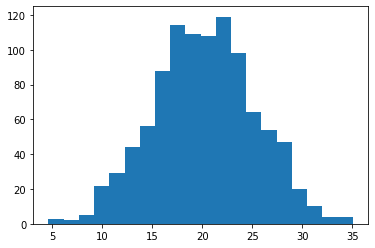

To plot histograms for all numeric columns in a DataFrame we can use hist(). The bins= argument set the number of bins (bars) we want in the histogram. Smaller bins provide more details but may make the distribution look jagged, while too big bins make the distribution less details.

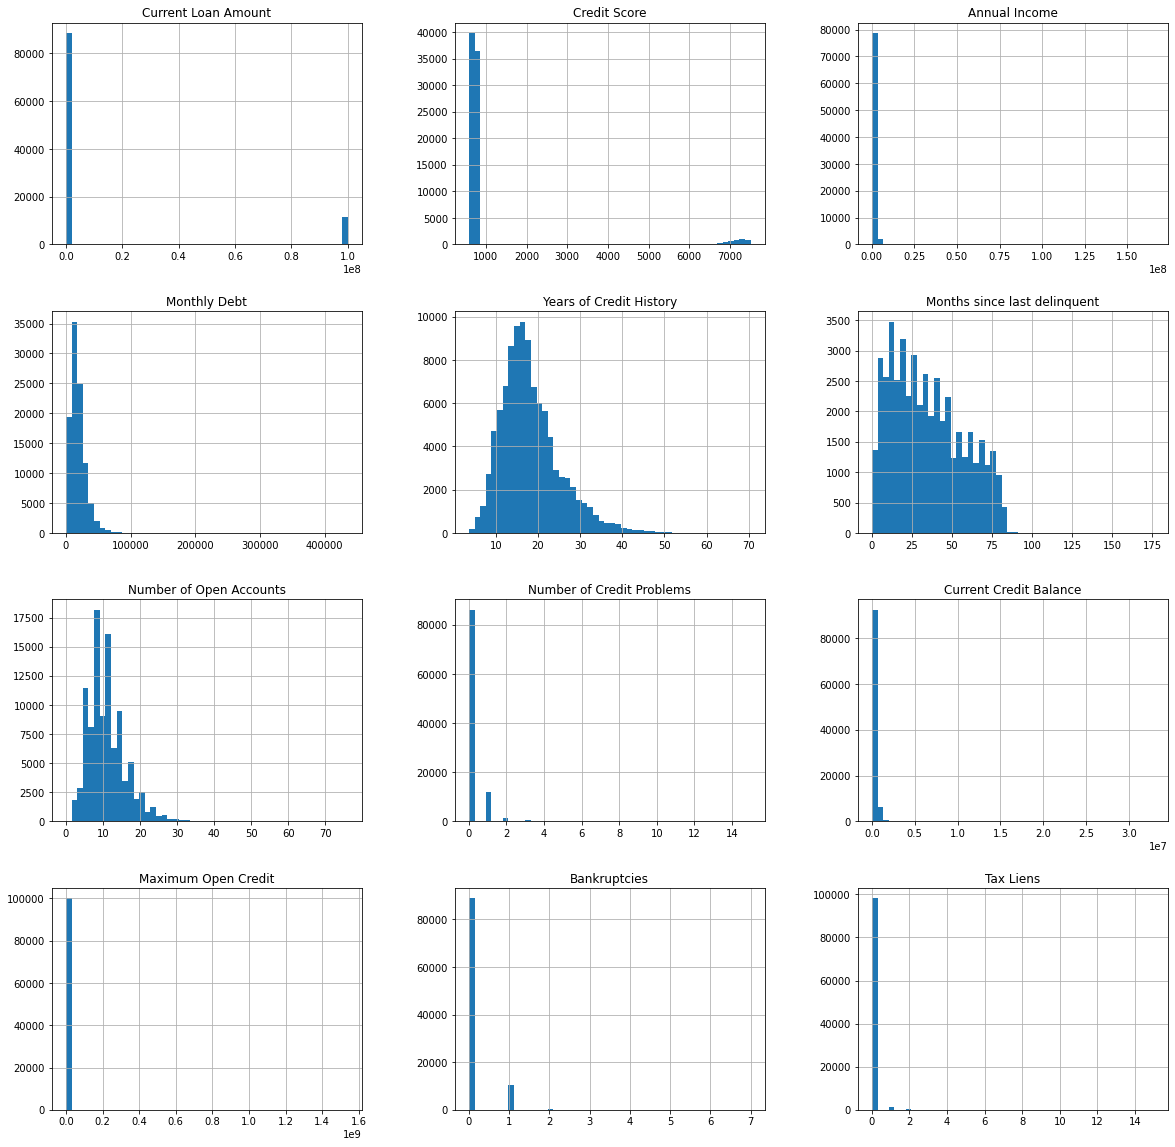

In [5]:
import matplotlib.pyplot as plt

credit.hist(bins=50, figsize=(20,20))
plt.show()

Let's have a closer look on columns with issues.

<h4>Current Loan Amount</h4>

The majority of loans have current amount around 10,000, however, some of them are at 10^8. We can look more into this. I will first extract the column to a new variable for convenience purpose.

In [ ]:
cla = credit['Current Loan Amount']

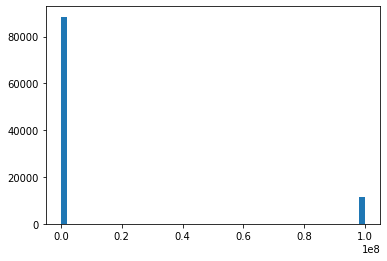

In [60]:
plt.hist(cla, bins=50)
plt.show()

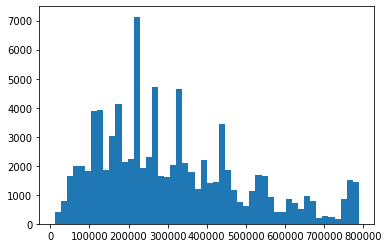

In [6]:
plt.hist(cla[cla<90000000], bins=50)
plt.show()

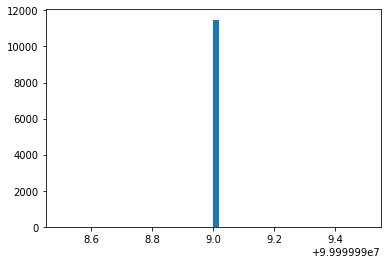

In [61]:
plt.hist(cla[cla>90000000], bins=50)
plt.show()

It turns out all these values are 99999999

In [7]:
cla[cla > 90000000]

2        99999999
10       99999999
12       99999999
13       99999999
26       99999999
           ...   
99970    99999999
99971    99999999
99990    99999999
99996    99999999
99999    99999999
Name: Current Loan Amount, Length: 11484, dtype: int64

Furthermore, any current loan amount of 999999999 means the loan is fully paid

In [8]:
credit['Loan Status'][cla > 90000000].value_counts()

Fully Paid    11484
Name: Loan Status, dtype: int64

This is an indicator that the 99999999 values are <b>coded</b>, i.e., they are not actual numbers but codes that refer to special values. In this example, it is likely that these values represent fully paid loans, which means we can replace them with current loan amounts of 0. 

<h4>Credit Score</h4>

The distribution looks a bit odd with some data having credit scores around 6500 to 7500.

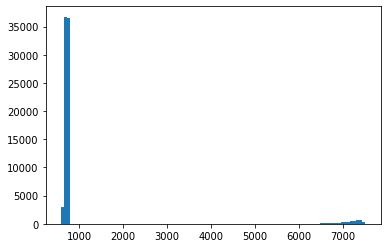

In [9]:
cs = credit['Credit Score']
plt.hist(cs, bins=100)
plt.show()

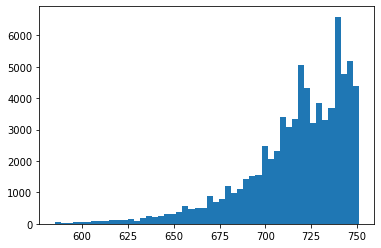

In [10]:
plt.hist(cs[cs<1000], bins=50)
plt.show()

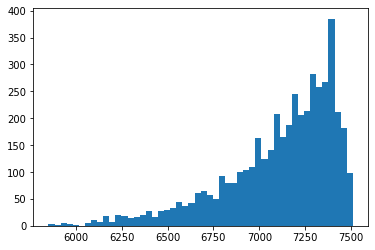

In [11]:
plt.hist(cs[cs>1000], bins=50)
plt.show()

Credit scores range between 300 and 850. So customers with credit score over 6000 are not normal. Furthermore, the distributions of the scores from 500 to 750 look very similar to that of 5000 to 7500. Therefore, we can conclude that for some reasons, the customers with scores over 5000 get their scores multiplied by 10, and we can fix that in preprocessing.

<h4>Annual Income</h4>

This column as a very <b>right skewed</b> distribution, which usually see in incomes -- the majority of customers earn below 1 million per year, and a few earns higher (up to 15 millions in this data).

In [12]:
ai = credit['Annual Income']

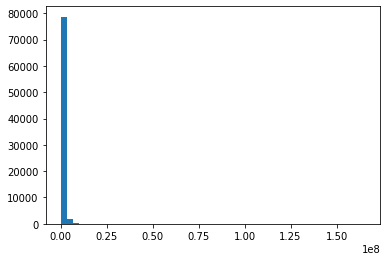

In [13]:
plt.hist(ai, bins=50)
plt.show()

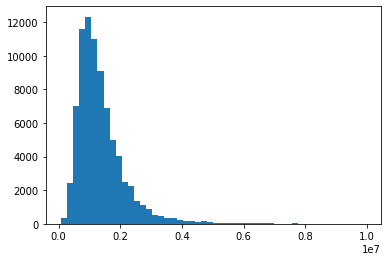

In [14]:
plt.hist(ai[ai < 10000000], bins=50)
plt.show()

In [15]:
ai[ai > 10000000]

10721    30838995.0
11522    14438100.0
11830    12574770.0
12617    14287050.0
13643    14118007.0
            ...    
96842    13591270.0
97144    12886579.0
97964    11463840.0
98823    11443320.0
99452    10149344.0
Name: Annual Income, Length: 68, dtype: float64

A closer look reveals 68 customers get very high incomes. We may leave this column as is, or may create a log version so it looks more balance.

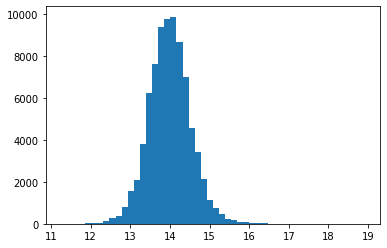

In [62]:
plt.hist(np.log(ai), bins=50)
plt.show()

<h4>Months since last delinquent</h4>

In [16]:
mld = credit['Months since last delinquent']

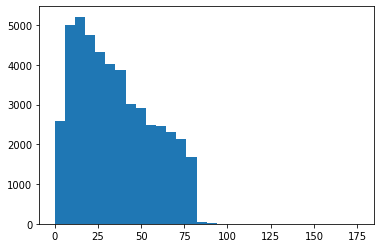

In [17]:
plt.hist(mld, bins=30)
plt.show()

In [18]:
mld.isna().sum()

53141

In terms of distribution, this column looks okay. However, the issue is with the 53141 customers with missing values. Based on the meaning of the column - months since last delinquent - missing values here are not actually missing. They are simply customers who have never had any delinquent. 

As a low values of mld means the customer has recently got a delinquent and is in contrast with those who never had any, we can fill these missing values with a very high number, for example, the maximum value of mld. We can also generate a binary indicator column -- whether the customer has ever had a delinquent, for the models to better learn.

<h4>Current Credit Balance</h4>

In [19]:
ccb = credit['Current Credit Balance']

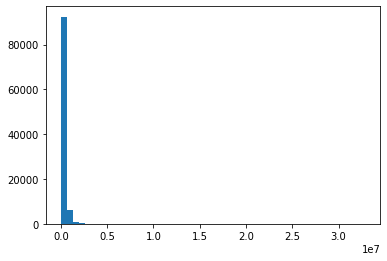

In [20]:
plt.hist(ccb, bins=50)
plt.show()

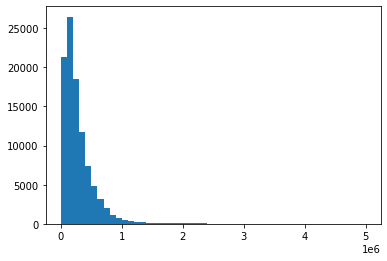

In [21]:
plt.hist(ccb[ccb < 5000000], bins=50)
plt.show()

In [22]:
ccb[ccb > 5000000]

63        5246261
3724      5742902
3854      7423870
3896      5176018
5369      5221295
           ...   
95805     6812773
96221    11796435
98104     6737818
99527     5032074
99721     7140732
Name: Current Credit Balance, Length: 74, dtype: int64

Fairly similar to annual income with a very right skewed distribution. We can leave this column as is, or add a log version.

<h4>Maximum Open Credit</h4>

In [23]:
moc = credit['Maximum Open Credit']

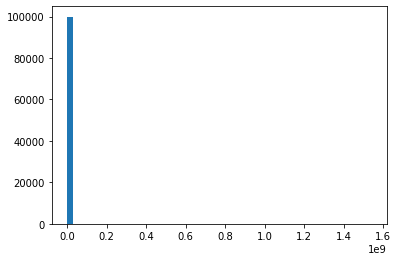

In [24]:
plt.hist(moc, bins=50)
plt.show()

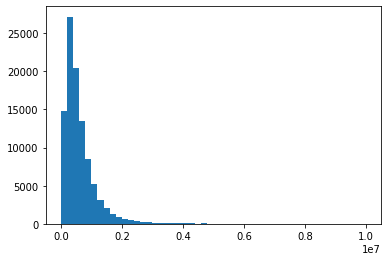

In [25]:
plt.hist(moc[moc < 10000000], bins=50)
plt.show()

In [26]:
moc[moc > 10000000]

63        11887678.0
378       10189234.0
594      145907344.0
1899      71309216.0
1920      14822676.0
            ...     
97653     12942688.0
98836     37879380.0
99670     30563280.0
99721    192284158.0
99964     24091892.0
Name: Maximum Open Credit, Length: 248, dtype: float64

Fairly similar to annual income with a very right skewed distribution. We can leave this column as is, or add a log version.

The next three columns also have a right skewed distribution, but they are different in that these are count values. We can see the majority of customers have these three values either 0 or 1, and very few gets 2 or above. We can also leave these columns as they are, and create a binary indicator - whether the customers have had credit problems, bankruptcies, and tax liens.

<h4>Number of Credit Problems</h4>

In [27]:
credit['Number of Credit Problems'].value_counts()

0     86035
1     12077
2      1299
3       378
4       125
5        49
6        17
7         8
8         4
11        2
10        2
9         2
15        1
12        1
Name: Number of Credit Problems, dtype: int64

<h4>Bankruptcies</h4>

In [28]:
credit['Bankruptcies'].value_counts()

0.0    88774
1.0    10475
2.0      417
3.0       93
4.0       27
5.0        7
6.0        2
7.0        1
Name: Bankruptcies, dtype: int64

<h4>Tax Liens</h4>

In [29]:
credit['Tax Liens'].value_counts()

0.0     98062
1.0      1343
2.0       374
3.0       111
4.0        58
5.0        16
6.0        12
7.0         7
9.0         3
11.0        2
15.0        1
10.0        1
Name: Tax Liens, dtype: int64

<h4>Categorical Columns</h4>

Categorical columns in this data are fairly clean. Besides some missing values, we do not see other issues.

In [30]:
cat_cols = ['Loan Status', 'Term','Years in current job', 'Home Ownership', 'Purpose']

for col in cat_cols:
    print(col)
    print(credit[col].value_counts())
    print()

Loan Status
Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

Term
Short Term    72208
Long Term     27792
Name: Term, dtype: int64

Years in current job
10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: Years in current job, dtype: int64

Home Ownership
Home Mortgage    48410
Rent             42194
Own Home          9182
Name: Home Ownership, dtype: int64

Purpose
Debt Consolidation    78552
other                  6037
Home Improvements      5839
Other                  3250
Business Loan          1569
Buy a Car              1265
Medical Bills          1127
Buy House               678
Take a Trip             573
major_purchase          352
small_business          283
moving                  150
wedding                 115
Name: Purpose, dtype: int64



<h2>Data Preprocessing</h2>

<h3> The Overfitting Problem and Train/Test Splitting</h3>

A machine learning model is <b>trained</b> from data to solve a given task 
- A very common problem in machine learning and data analytics is that a model can be trained "too much" on a dataset and adapt poorly to new data. This is problem is referred to as the <b>overfitting</b> problem. Formally, it means that a model works very well in the data on which it was trained, but performs <b>much worse</b> on newly given data. 

For example, assume we are trying to predict a numeric Target using a numeric Feature, and come up with two models as below. - - The dots are data instances
- To the right side of the dash line is the <b>training data</b> - data on which we train the model 
- To the left side of the dash line is new data 
- The curves represent predictions made by each model

Which model do you prefer?

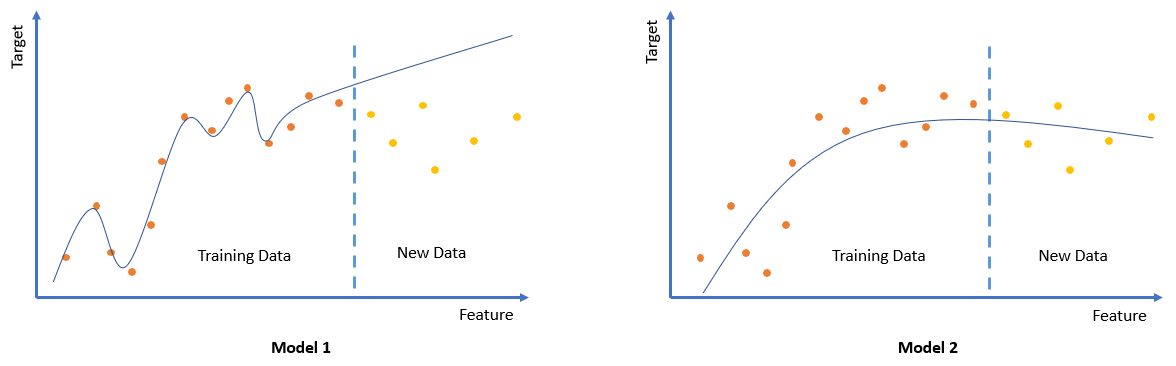

- Model 1 certainly makes very accurate prediction in the training data, however very poorly in the new data. 
- Model 2 performs well enough in both training and new data. 

In this case, model 1 is overfitting the training data, and model 2 is better to use (because we always want good performances in new data).

To avoid overfitting, we need to measure how models are performing in its training data and in new data. 
- Because we usually cannot get new data during analysis, we split data into at least two sets which are called <b>training data</b> and <b>testing data</b>
    - Training data is used to train our models
    - Testing data acts as new data coming in, is used to test models' performances on data they have <b>never seen before</b>.
    
Note that the <b>never seen before</b> criterion is highly important. All of your analysis <b>must</b> be done in the training data (from preprocessing, preliminary analysis, to model selection, finetuning...). Testing data is <b>only used</b> at <b>the end</b> where all models have been finalized to compare their performances on new data.

<h4> Splitting Data with SKLearn </h4>

SKLearn provides several methods for us to split data into training and testing sets

<h5> Random Split </h5>

Data instances are randomly selected and put into the training set and testing set. You can choose the ratio of training/testing like 50:50, 75:25, 80:20... If the data is big enough, you can choose 50:50, otherwise, 75:25 or 80:20, because we still want to have as much training data as possible.

In SKLearn, we use <b>sklearn.model_selection.train_test_split()</b>

First, as usual, we split the features and the label

In [31]:
X = credit.drop(['Loan ID','Customer ID','Loan Status'], axis=1)
y = credit['Loan Status']

In [32]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.25)

trainX.shape, testX.shape, trainY.shape, testY.shape

((75000, 16), (25000, 16), (75000,), (25000,))

In [33]:
(trainY == 'Fully Paid').mean()

0.7726133333333334

In [34]:
(testY == 'Fully Paid').mean()

0.7766

<h5>Stratified Split</h5>

We can select a column to stratify the split to reserve the distribution of said column

In [35]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.25, stratify=y)

trainX.shape, testX.shape, trainY.shape, testY.shape

((75000, 16), (25000, 16), (75000,), (25000,))

In [36]:
(trainY == 'Fully Paid').mean()

0.7736133333333334

In [37]:
(testY == 'Fully Paid').mean()

0.7736

<h3>Transforming Existing Columns </h3>

This part is very particular for this specific dataset. Please do not try to apply this to a different one without checking what you need to do first.

In [38]:
from sklearn.preprocessing import FunctionTransformer

In [39]:
def fix_columns(X_in):
    X = X_in.copy()
    X.loc[X['Current Loan Amount'] == 99999999, 'Current Loan Amount'] = 0
    X.loc[X['Credit Score'] > 1000, 'Credit Score'] /= 10
    X.loc[X['Bankruptcies'] > 1, 'Bankruptcies'] = 1
    X.loc[X['Tax Liens'] > 1, 'Tax Liens'] = 1
    X.loc[X['Number of Credit Problems'] > 1, 'Number of Credit Problems'] = 1
    X.loc[X['Months since last delinquent'].isna(), 'Months since last delinquent'] = 200
    log_cols = ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 
                'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts',
                'Current Credit Balance', 'Maximum Open Credit']
    for col in log_cols:
        X['Log ' + col] = np.log(X[col] + 1)
    return X

In [40]:
trainX_transformed = FunctionTransformer(fix_columns).fit_transform(trainX)

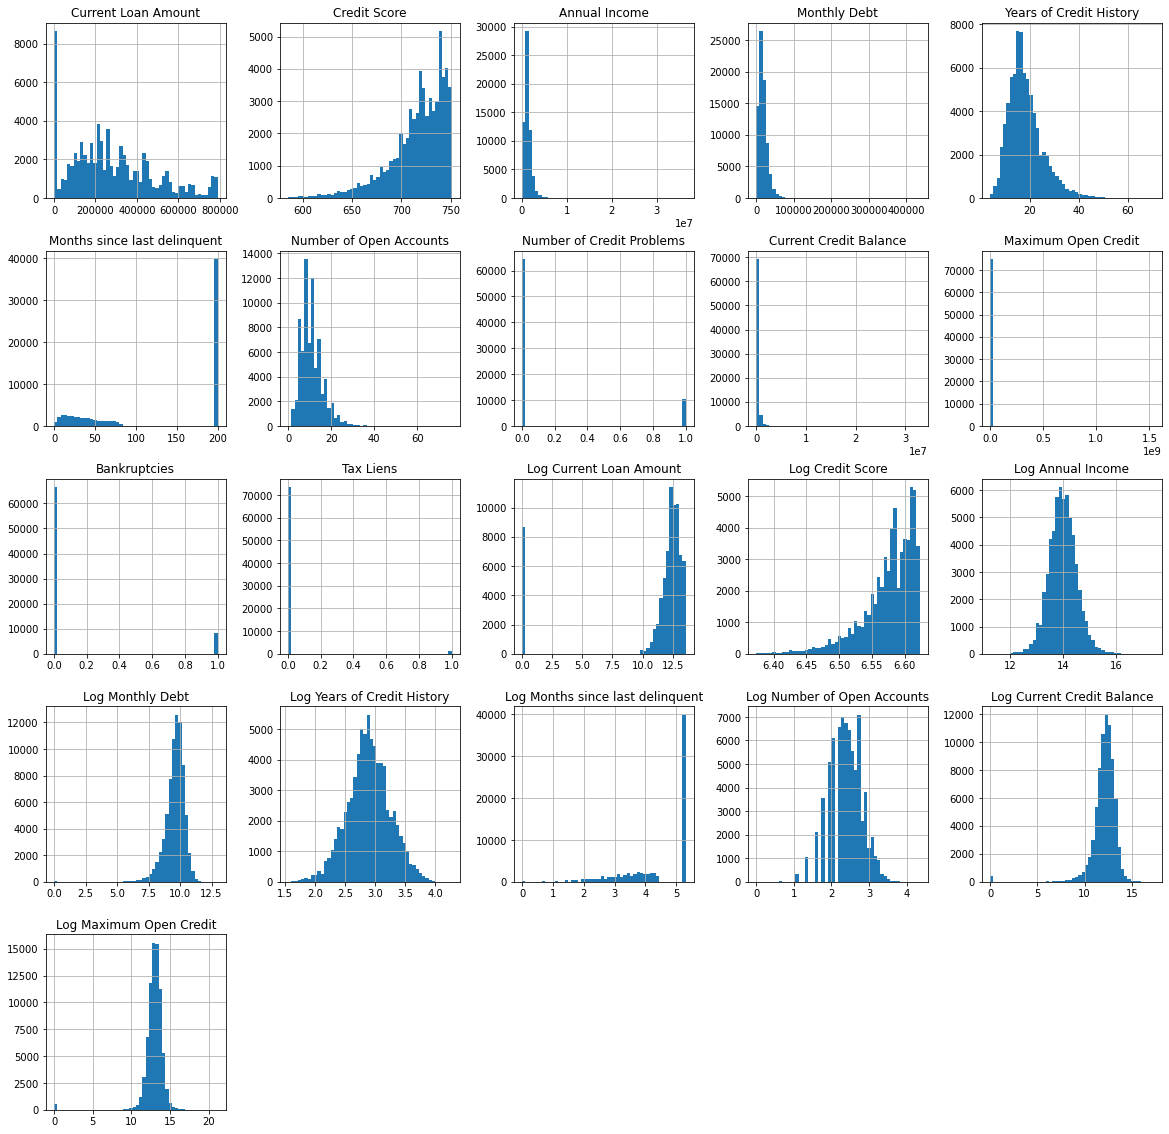

In [41]:
trainX_transformed.hist(bins=50, figsize=(20,20))
plt.show()

<h3>Standardizing Numeric Columns</h3>

As discussed, some models deal with large differences in ranges of values of attributes poorly. We usually want all numeric attributes to have similar ranges. A of doing this is <b>standardization</b>. In standardization, we transform the values in the column so that they has mean of 0 and standard deviation of 1

In SKLearn, we can use <b>sklearn.preprocessing.StandardScaler</b>. The <b>fit_transform()</b> function will do everything in one step. 

One thing to note is, StandardScaler cannot work on class attributes, and will report errors if your give it a DataFrame that has class attributes. We need to filter out such columns, which can be done with <b>DataFrame.select_dtypes('number')</b>

In [42]:
from sklearn.preprocessing import StandardScaler

trainX_stdz = StandardScaler().fit_transform(trainX_transformed.select_dtypes('number'))

Another thing to note is that the normalized version of the DataFrame is no longer a DataFrame but a numpy array. This doesn't matter much, we want data as numpy arrays when modeling anyway. It just means we won't be able to use functions of DataFrame any more. We can temporary convert the standardized data back to DataFrame to use describe(). As you can see, now all attributes have more similar ranges of values

In [43]:
trainX_transformed.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Tax Liens,Log Current Loan Amount,Log Credit Score,Log Annual Income,Log Monthly Debt,Log Years of Credit History,Log Months since last delinquent,Log Number of Open Accounts,Log Current Credit Balance,Log Maximum Open Credit
count,75000.000000,60698.000000,6.069800e+04,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,7.500000e+04,7.499900e+04,...,74992.000000,75000.000000,60698.000000,60698.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,74999.000000
mean,276323.636453,716.335365,1.376275e+06,18484.746977,18.206561,122.752133,11.118653,0.139747,2.958234e+05,7.483686e+05,...,0.019042,11.011699,6.574736,13.990679,9.589561,2.891894,4.377705,2.412452,12.097111,12.955404
std,201479.986949,28.282765,9.173650e+05,12214.596417,7.020809,83.715839,5.014911,0.346726,3.846981e+05,7.842222e+06,...,0.136674,4.028724,0.040600,0.523446,0.794590,0.357165,1.132837,0.410870,1.373678,1.359872
min,0.000000,585.000000,7.662700e+04,0.000000,3.700000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,6.373320,11.246718,0.000000,1.547563,0.000000,0.000000,0.000000,0.000000
25%,128722.000000,703.000000,8.500125e+05,10199.960000,13.500000,34.000000,8.000000,0.000000,1.127650e+05,2.734380e+05,...,0.000000,11.765418,6.556778,13.653008,9.230237,2.674149,3.555348,2.197225,11.633070,12.518834
50%,241340.000000,722.000000,1.174010e+06,16219.825000,17.000000,200.000000,10.000000,0.000000,2.098930e+05,4.679840e+05,...,0.000000,12.393966,6.583409,13.975937,9.694051,2.890372,5.303305,2.397895,12.254358,13.056192
75%,402314.000000,739.000000,1.653076e+06,24054.950000,21.700000,200.000000,14.000000,0.000000,3.685050e+05,7.819900e+05,...,0.000000,12.904991,6.606650,14.318149,10.088138,3.122365,5.303305,2.708050,12.817212,13.569599
max,789250.000000,751.000000,3.647544e+07,435843.280000,70.500000,200.000000,76.000000,1.000000,3.287897e+07,1.539738e+09,...,1.000000,13.578840,6.622736,17.412150,12.985040,4.269697,5.303305,4.343805,17.308344,21.154878


In [44]:
pd.DataFrame(trainX_stdz).describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,7.500000e+04,6.069800e+04,6.069800e+04,7.500000e+04,7.500000e+04,7.500000e+04,7.500000e+04,7.500000e+04,7.500000e+04,7.499900e+04,...,7.499200e+04,7.500000e+04,6.069800e+04,6.069800e+04,7.500000e+04,7.500000e+04,7.500000e+04,7.500000e+04,7.500000e+04,7.499900e+04
mean,1.186843e-16,-5.507766e-16,-1.053558e-17,1.971519e-16,2.809012e-17,2.349528e-17,1.521509e-16,4.121148e-17,4.504841e-17,3.694871e-18,...,-4.168962e-17,1.005655e-16,-6.931532e-15,1.023970e-15,-8.146609e-16,5.897505e-16,1.545194e-16,9.206739e-16,-8.899785e-16,-6.221595e-16
std,1.000007e+00,1.000008e+00,1.000008e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,...,1.000007e+00,1.000007e+00,1.000008e+00,1.000008e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-1.371479e+00,-4.643692e+00,-1.416731e+00,-1.513343e+00,-2.066237e+00,-1.466305e+00,-2.217133e+00,-4.030487e-01,-7.689807e-01,-9.542877e-02,...,-1.393258e-01,-2.733315e+00,-4.960970e+00,-5.242151e+00,-1.206864e+01,-3.763921e+00,-3.864399e+00,-5.871612e+00,-8.806422e+00,-9.526996e+00
25%,-7.325920e-01,-4.715053e-01,-5.736727e-01,-6.782739e-01,-6.703776e-01,-1.060166e+00,-6.218802e-01,-4.030487e-01,-4.758527e-01,-6.056112e-02,...,-1.393258e-01,1.870876e-01,-4.422938e-01,-6.450983e-01,-4.522152e-01,-6.096542e-01,-7.259317e-01,-5.238380e-01,-3.378112e-01,-3.210398e-01
50%,-1.736345e-01,2.002874e-01,-2.204870e-01,-1.854287e-01,-1.718562e-01,9.227451e-01,-2.230669e-01,-4.030487e-01,-2.233725e-01,-3.575345e-02,...,-1.393258e-01,3.431054e-01,2.136377e-01,-2.816422e-02,1.315033e-01,-4.262947e-03,8.170691e-01,-3.543019e-02,1.144721e-01,7.411611e-02
75%,6.253286e-01,8.013651e-01,3.017369e-01,4.560315e-01,4.975868e-01,9.227451e-01,5.745597e-01,-4.030487e-01,1.889328e-01,4.287258e-03,...,-1.393258e-01,4.699515e-01,7.860743e-01,6.256091e-01,6.274684e-01,6.452820e-01,8.170691e-01,7.194487e-01,5.242173e-01,4.516594e-01
max,2.545810e+00,1.225655e+00,3.826116e+01,3.416906e+01,7.448399e+00,9.227451e-01,1.293777e+01,2.481090e+00,8.469854e+01,1.962454e+02,...,7.177423e+00,6.372137e-01,1.182284e+00,6.536487e+00,4.273274e+00,3.857635e+00,8.170691e-01,4.700676e+00,3.793659e+00,6.029635e+00


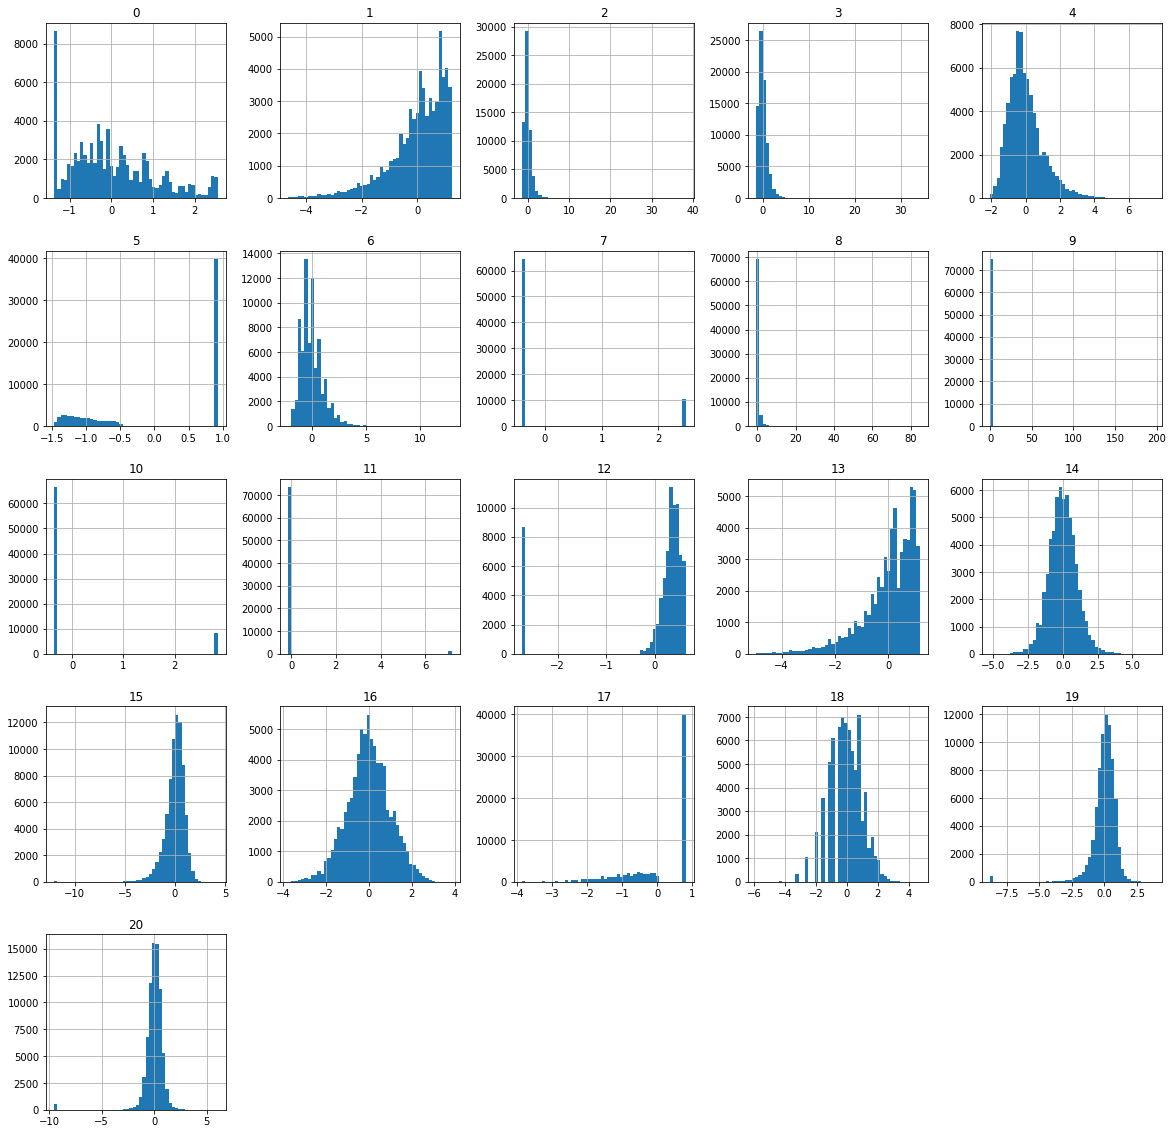

In [45]:
pd.DataFrame(trainX_stdz).hist(bins=50, figsize=(20,20))
plt.show()

<h3>Dealing with Missing Data</h3>

As mentioned, rows with missing values cannot be used in most models and need to be handled. There are a few treatments for missing values.

<h4>1. Dropping Rows with Missing Values</h4>

Not the best way to handle missing data, but also not the worst. This approach is rather frowned upon in statistics, but it's okay for us because we are using machine learning :)

Dropping missing values is simple with Pandas. We can use <b>DataFrame.dropna()</b>. Notice how the number of rows drops from 690 to 653 afterward. dropna() won't change the original DataFrame, so we need to store the new DataFrame in a new variable.

In [46]:
trainX_dropna = trainX.dropna()
trainX_dropna.shape, trainX.shape

((27195, 16), (75000, 16))

<h4>2. Imputation</h4>

Dropping missing data has certain problems

1. Losing information. We have to drop a whole row even if it only has one field missing. Furthermore, in many cases, missing data can be a strong pattern for analysis.
2. Not enough data for modeling. In many cases, the data can be very dirty, and dropping all missing may result in a much smaller dataset.

A preferred way in such cases is to <b>impute</b> the missing data. This means to replace missing values with a certain value. 

If the column with missing value is a class column, we can simply replace the missing values with a missing class, for example, 'missing'. In sklearn, we use SimpleImputer for imputation with constants.

In [47]:
from sklearn.impute import SimpleImputer

cat_cols = ['Term','Years in current job', 'Home Ownership', 'Purpose']
trainX_imp = SimpleImputer(strategy='constant',fill_value='missing').fit_transform(trainX[cat_cols])

In [48]:
trainX[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75000 entries, 4070 to 51138
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Term                  75000 non-null  object
 1   Years in current job  71829 non-null  object
 2   Home Ownership        74831 non-null  object
 3   Purpose               74834 non-null  object
dtypes: object(4)
memory usage: 2.9+ MB


In [49]:
pd.DataFrame(trainX_imp).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       75000 non-null  object
 1   1       75000 non-null  object
 2   2       75000 non-null  object
 3   3       75000 non-null  object
dtypes: object(4)
memory usage: 2.3+ MB


When the column being imputed is numeric, a very common strategy is to use the median of the column as the replacing value. We will still use fillna()

In [50]:
num_cols = trainX.drop(['Term','Years in current job', 'Home Ownership', 'Purpose'], axis=1).columns
trainX_imp2 = SimpleImputer(strategy='median').fit_transform(trainX[num_cols])

In [51]:
pd.DataFrame(trainX_imp2).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       75000 non-null  float64
 1   1       75000 non-null  float64
 2   2       75000 non-null  float64
 3   3       75000 non-null  float64
 4   4       75000 non-null  float64
 5   5       75000 non-null  float64
 6   6       75000 non-null  float64
 7   7       75000 non-null  float64
 8   8       75000 non-null  float64
 9   9       75000 non-null  float64
 10  10      75000 non-null  float64
 11  11      75000 non-null  float64
dtypes: float64(12)
memory usage: 6.9 MB


A note when imputing missing values in numeric columns is that no matter which approach you use, the replacing data is still "fake" data. They may affect your models when their proportion is large. In general, if the column has more than 25-30% missing values, then you are probably better off dropping it.

SKLearn provides another type of imputation - KNNImputation. Please do a bit research on this method.

<h3>Encoding Class Attributes</h3>

Very few models can directly use class attributes. Very often, we need to find a way to convert class attributes to numeric ones. We will discuss a few in this module.

<h4>One Hot Encoding</h4>

In this method, we create a new <b>binary</b> column for <b>each distinct value</b> in the class column. This means, a class column that has three values, for example, (low, medium, high), will result in three new binary columns. Here, binary means the columns only have two distinct value, 0 and 1. The value is 1 when the row belong to the corresponding class of the column, and 0 otherwise. For example

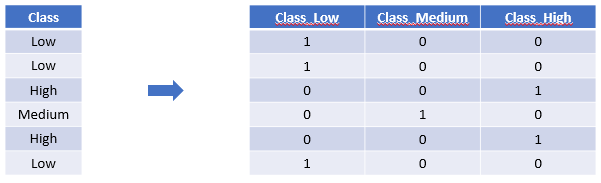

As you can see, rows that have class of low have the new attribute class_low of 1, and the rest being 0. Similarly for rows in medium class, and high class.

In SKLearn, we can use <b>sklearn.preprocessing.OneHotEncoder</b>. Similar to StandardScaler, this is done quite easily with <b>fit_transform()</b>. This transformation also outputs numpy array instead of DataFrame. Again, this doesn't matter much.

In [52]:
from sklearn.preprocessing import OneHotEncoder

#notice the double brackets in iris[['class']] 
#This is because fit_transform only takes 2D data, 
#and iris['class'] is a pandas series which is an 1D object

#another note, fit_transform() returns a sparse array
#so we need to use toarray() to obtain a regular numpy array
onehot = OneHotEncoder(sparse=False)
trainX_class_code = onehot.fit_transform(trainX_imp)

trainX_class_code, trainX_class_code[0], trainX_class_code.shape

(array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 1., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 (75000, 32))

<h4>Target Encoding (Optional Material)</h4>

One hot encoding is effective only if the number of unique values in the class column is small. If you have a class column that stores the, for example, states in the US - which means over 50 unique values, this approach will result in over 50 new columns in the data. Furthermore, data in these columns are very sparse (which mean most values are 0) and we don't usually like that. In cases like this, we prefer the <b>Target Encoder</b> approach.

<b>Target Encoder</b> requires the data to have a target. Since we will be working with supervised learning in this course, this is not a problem. In brief, Target Encoding  relaces the classes' values with the expected values of target.

We will use the package <b>category_encoders</b> for this transform. You can install the package with

<b>pip install category_encoders</b>

or if you are using Linux/Mac

<b>sudo pip install category_encoders</b>

After installing the module, we can use <b>TargetEncoder</b>

In [53]:
from category_encoders import TargetEncoder

targetencode = TargetEncoder()

#now we can use the encoder
trainX_coded = targetencode.fit_transform(trainX, y=(trainY=='Charged Off'))

trainX_coded[cat_cols]

C:\Users\linhl\miniconda3\envs\tfbase\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\linhl\miniconda3\envs\tfbase\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


,Term,Years in current job,Home Ownership,Purpose
4070,0.197811,0.232275,0.202813,0.227759
43409,0.197811,0.214610,0.202813,0.236497
24745,0.300764,0.229896,0.202813,0.236497
41469,0.300764,0.229896,0.253288,0.227759
41618,0.300764,0.227850,0.228742,0.227759
...,...,...,...,...
33712,0.197811,0.214610,0.202813,0.227759
10439,0.197811,0.214610,0.253288,0.227759
3043,0.300764,0.214610,0.202813,0.227759
14474,0.300764,0.232275,0.202813,0.227759


<h3>SKLearn Processing Pipeline</h3>

SKLearn provides a very powerful processing tool called <b>pipeline</b>. A pipeline allows us to combine all previously discussed steps into one single object that can be easily applied onto different parts of the data. In this example, we build a processing pipeline that includes

1. Data correction and log transformation
2. Imputation
3. Standardization
4. One Hot Encoder

We will separate the preprocessing of numeric and class columns in two different pipelines and combine them using ColumnTransformer

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [55]:
def fix_columns(X_in):
    X = X_in.copy()
    X.loc[X['Current Loan Amount'] == 99999999, 'Current Loan Amount'] = 0
    X.loc[X['Credit Score'] > 1000, 'Credit Score'] /= 10
    X.loc[X['Bankruptcies'] > 1, 'Bankruptcies'] = 1
    X.loc[X['Tax Liens'] > 1, 'Tax Liens'] = 1
    X.loc[X['Number of Credit Problems'] > 1, 'Number of Credit Problems'] = 1
    X.loc[X['Months since last delinquent'].isna(), 'Months since last delinquent'] = 200
    log_cols = ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 
                'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts',
                'Current Credit Balance', 'Maximum Open Credit']
    for col in log_cols:
        X['Log ' + col] = np.log(X[col] + 1)
    return X

num_pipeline = Pipeline([
    ('log transform', FunctionTransformer(fix_columns, validate=False)),
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
])

In [56]:
cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='constant',fill_value='missing')),
    ('encode', OneHotEncoder())
])

In [57]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ('numeric', num_pipeline, num_cols),
    ('class', cat_pipeline, cat_cols)
])

In [58]:
trainX_prc = full_pipeline.fit_transform(trainX)

trainX_prc.shape

(75000, 53)

The pipeline can then be applied on the test data. However, always remember to run <b>fit_transform on training data</b>, and <b>only transform on test data</b>.

In [59]:
testX_prc = full_pipeline.transform(testX)

testX_prc.shape

(25000, 53)